# Tarea 2
### Aquino Chapa Martha Abril
Hecho en Python

In [3]:
#importamos las paqueterías
from pylab import *
import random
from numpy import array
# from numpy import *
import math
#from tabulate import tabulate

#### 1. En clase vimos la forma de hacer la integral numérica en la que se aproxima la integral de una función de la siguiente manera $$ \int_{x_i-h}^{x_i+h}f(x)dx=\frac{f(x_i-1)+4f(x_i)+f(x_i+1)}{3}h+\mathcal{O}(h^{5})$$
donde se desprecian los términos $\mathcal{O}$. Calcule las integrales de las siguientes funciones para una malla uniforme:

* $$\int_0^{5}f(x)dx$$
* $$ \int_{-5}^{5}f^{2}(x)dx$$
* $$ \int_{0.5}^{5}g(x)dx$$

Donde $f(x)=e^{-x^{2}}\sin(x)$ y $g(x)=-{\frac{2}{x^{6}}}+{\frac{1}{x^{12}}}$. Muestre que ha podido integrar hasta una precisión de $10^{-4}$.

In [4]:
#Definimos la función integral del ejercicio 1a
#La función dependera de a y b, los límites de la integral, n el número de puntos en la malla y f(x) la función de x
def int1(f,x):
    #Definimos la malla con la que trabajaremos
   ## x=linspace(a,b,n)
    #Definimos el espacio entre dos puntos contiguos en la malla
    h = x[2] - x[1]
    #Le damos un valor incial a la integral desde el cual empezará a sumar el valor de la integral
    integral = 0 
    #Definimos la condiciones en las cuales se evaluará nuestra integral:
    #Si la malla en la cual vamos a integrar es par, pedimos que saque la integral del a partir de segundo elemento
    if mod(len(f),2) == 0:
        inicio = 2
    #Si el número de puntos en la malla no es par le pedimos que inicie un elemento despues del primero en la malla
    elif mod(len(f),2) == 1:
        inicio = 1
    #Definimos la parte del código con la que sumaremos las particiones de la integral y que vaya saltando 2 puntos
    for i in range(inicio,len(f)-1,2):
        integral += f[i+1] + 4*f[i] + f[i-1]
    integral = integral*(h/3)
    # punto inicial si se tiene un arreglo par
    if mod(len(f),2) == 0:
        integral += (h/48)*(23*f[0] + 26*f[1] - 4*f[2] + 6*f[3] -3*f[4])
    return integral

In [5]:
# Obtenemos entonces la integral de f(x):
#Definimos la malla
x=linspace(0,5,1000)
f=exp(-(x*x))*sin(10*x)
print(r"La integral de $e^{-x^{2}}$ es ", int1(f,x))
#Dicha integral, hecha en wolfram tiene el valor de :
#m=integrate(cos(x), (x,0,pi/2.0))
m=0.1021340744237976138708054220876899
#Obtenemos el error asociado a la integral, segun la integral de wolfram
print("La precisión de la integral es: ", abs(m-int1(f,x)))

La integral de $e^{-x^{2}}$ es  0.1021341884080086
La precisión de la integral es:  1.1398421098651745e-07


In [6]:
# Obteniendo ahora el algoritmo para la segunda integral, es lo mismo pero en este caso tendremos f^2
#Para ello hacemos el cambio de variable de f a f^2
#Definimos la función integral del ejercicio 1a
#La función dependera de a y b, los límites de la integral, n el número de puntos en la malla y f(x) la función de x
def int2(f,x):
    #Definimos la malla con la que trabajaremos
   ## x=linspace(a,b,n)
    #Definimos el espacio entre dos puntos contiguos en la malla
    h = x[2] - x[1]
    #Le damos un valor incial a la integral desde el cual empezará a sumar el valor de la integral
    integral = 0 
    #Definimos la condiciones en las cuales se evaluará nuestra integral:
    #Si la malla en la cual vamos a integrar es par, pedimos que saque la integral del a partir de segundo elemento
    if mod(len(f),2) == 0:
        inicio = 2
    #Si el número de puntos en la malla no es par le pedimos que inicie un elemento despues del primero en la malla
    elif mod(len(f),2) == 1:
        inicio = 1
    #Definimos la parte del código con la que sumaremos las particiones de la integral y que vaya saltando 2 puntos
    for i in range(inicio,len(f)-1,2):
        integral += f[i+1]*f[i+1] + 4*f[i]*f[i] + f[i-1]*f[i-1]
    integral = integral*(h/3)
    # punto inicial si se tiene un arreglo par
    if mod(len(f),2) == 0:
        integral += (h/48)*(23*f[0]*f[0] + 26*f[1]*f[1] - 4*f[2]*f[2] + 6*f[3]*f[3] -3*f[4]*f[4])
    return integral

In [7]:
# Obtenemos entonces la integral de f(x):
#Definimos la malla
x=linspace(-5,5,48)
f=exp(-(x*x))*sin(10*x)
print("La integral de $(e^{-x^{2}})^{2}$ es ", int2(f,x))
#Dicha integral, hecha en wolfram tiene el valor de :
m=0.6266570686577501256038175123698260447534631408887006665615074330
#Obtenemos el error asociado a la integral, segun la integral de wolfram
print("La precisión de la integral es: ", abs(m-int2(f,x)))

La integral de $(e^{-x^{2}})^{2}$ es  0.6266644078503681
La precisión de la integral es:  7.339192617972223e-06


In [8]:
#Notemos que el código para la primera integral nos sirve para el inciso c
x=linspace(0.5,5,10000)
f=-(2/x**6)+(1/x**12)
m=173.382
print("La integral de $-(2/x**6)+(1/x**12)$ es ", int1(f,x))
#Obtenemos el error asociado a la integral, segun la integral de wolfram
print("La precisión de la integral es: ", abs(m-int1(f,x)))

La integral de $-(2/x**6)+(1/x**12)$ es  173.3819466718035
La precisión de la integral es:  5.3328196514712545e-05


#### 2. Haga una función que implemente la integral numérica utilizando la regla de ''Simpson $\frac{3}{8}$'' dada por la relación: 
$$\int_{x_i}^{x_i+3}=\frac{3h}{8}\left(  f(x_i)+3f(x_{i+1})+3f(x_{i+2})+f(x_{i+3})\right)+\mathcal{O}(h^{5})$$

#### donde se desprecian los términos $\mathcal{O}(h^{5}$. Utilice este algoritmo para obtener lasa integrales del problema anterior con una precisión de $10^{-4}$.



In [9]:
#Definimos la función que nos calcule la integral de Simpson
#La función dependera de a y b, los límites de la integral, n el número de puntos en la malla y f(x) la función de x
def intSimpson(f,x):
    #Definimos el espacio entre dos puntos contiguos en la malla
    h = x[2] - x[1]
    #Le damos un valor incial a la integral desde el cual empezará a sumar el valor de la integral
    integral = 0 
    #Definimos la condiciones en las cuales se evaluará nuestra integral:
    #Si la malla en la cual vamos a integrar es par, pedimos que saque la integral del a partir de segundo elemento
    if mod(len(f)-1,3) == 0:
        inicio = 0
        
    if mod(len(f)-1,3) == 1:
        inicio = 1
        
    elif mod(len(f)-1,3) == 2:
        inicio = 2
    #Definimos la parte del código con la que sumaremos las particiones de la integral y que vaya saltando 2 puntos
    for i in range(inicio,len(f)-4 ,3):
        integral += f[i]+3*f[i+1]+3*f[i+2]+f[i+3]
    integral = integral*(3*h/8)
    
    # Si es divisible entre 3 la malla
    if mod(len(f)-1,3) == 2:
        integral += (f[0] + 4*f[1] + f[2])*(h/3)
        
    
    if mod(len(f)-1,3) == 1:
        integral += (h/48)*(23*f[0]+ 26*f[1] - 4*f[2] + 6*f[3] -3*f[4])
        #integral += (h/48)*(23*f[0]*f[0] + 26*f[1]*f[1] - 4*f[2]*f[2] + 6*f[3]*f[3] -3*f[4]*f[4])
    return integral

Ya que tenemos el algoritmo para la integral de una función f usemosla para obtener la integral de las funciones del ejercicio 1.
Iniciamos con $f(x)$

In [10]:
x=linspace(0,5,100)
f=exp(-(x*x))*sin(10*x)
print(r"La integral de $e^{-x^{2}}$ es ", intSimpson(f,x))
#Dicha integral, hecha en wolfram tiene el valor de :
#m=integrate(cos(x), (x,0,pi/2.0))
m=0.1021340744237976138708054220876899
#Obtenemos el error asociado a la integral, segun la integral de wolfram
print("La precisión de la integral es: ", abs(m-intSimpson(f,x)))

La integral de $e^{-x^{2}}$ es  0.10222669406705334
La precisión de la integral es:  9.261964325572858e-05


Debido a que queremos la integral de una función al cuadrado, la función intSimpson no nos sirve, a menos que queramos elevar nuestra función al cuadrado, pero aveces somos flojos, entonces modificamos el código de la función anterior intercambiando f por $f^{2}$ para solo meter la función y ahorrar tiempo :D

In [11]:
#Definimos la función que nos calcule la integral de Simpson
#La función dependera de a y b, los límites de la integral, n el número de puntos en la malla y f(x) la función de x
def intSimpson2(f,x):
    #Definimos el espacio entre dos puntos contiguos en la malla
    h = x[2] - x[1]
    #Le damos un valor incial a la integral desde el cual empezará a sumar el valor de la integral
    integral = 0 
    #Definimos la condiciones en las cuales se evaluará nuestra integral:
    #Si la malla en la cual vamos a integrar es par, pedimos que saque la integral del a partir de segundo elemento
    if mod(len(f)-1,3) == 0:
        inicio = 0
        
    if mod(len(f)-1,3) == 1:
        inicio = 1
        
    elif mod(len(f)-1,3) == 2:
        inicio = 2
    #Definimos la parte del código con la que sumaremos las particiones de la integral y que vaya saltando 2 puntos
    for i in range(inicio,len(f)-4 ,3):
        integral += f[i]*f[i]+3*f[i+1]*f[i+1]+3*f[i+2]*f[i+2]+f[i+3]*f[i+3]
    integral = integral*(3*h/8)
    
    # Si es divisible entre 3 la malla
    if mod(len(f)-1,3) == 2:
        integral += (f[0]*f[0] + 4*f[1]*f[1] + f[2]*f[2])*(h/3)
        
    
    if mod(len(f)-1,3) == 2:
        integral += (h/48)*(23*f[0]*f[0] + 26*f[1]*f[1] - 4*f[2]*f[2] + 6*f[3]*f[3] -3*f[4]*f[4])
    return integral

In [12]:
# Obtenemos entonces la integral de f(x):
#Definimos la malla
x=linspace(-5,5,140)
f=exp(-(x*x))*sin(10*x)
print("La integral de $(e^{-x^{2}})^{2}$ es ", intSimpson2(f,x))
#Dicha integral, hecha en wolfram tiene el valor de :
m=0.6266570686577501256038175123698260447534631408887006665615074330
#Obtenemos el error asociado a la integral, segun la integral de wolfram
print("La precisión de la integral es: ", abs(m-intSimpson2(f,x)))

La integral de $(e^{-x^{2}})^{2}$ es  0.6266582861443991
La precisión de la integral es:  1.2174866489411684e-06


Ahora obtenemos la integral de la función g utilizando la función intSimp

In [13]:
#Notemos que el código para la primera integral nos sirve para el inciso c
x=linspace(0.5,5,10000)
f=-(2/x**6)+(1/x**12)
m=173.382
print("La integral de $-(2/x**6)+(1/x**12)$ es ", intSimpson(f,x))
#Obtenemos el error asociado a la integral, segun la integral de wolfram
print("La precisión de la integral es: ", abs(m-intSimpson(f,x)))

La integral de $-(2/x**6)+(1/x**12)$ es  173.38194638945512
La precisión de la integral es:  5.3610544881621536e-05


### 3. Haga una función que implemente la integral númerica utilizando la regla de ''Boole'' dada por la relación 
$$\int_{x_i}^{x_{i+4}}f(x)={\frac{2h}{48}}(7f(x_i)+32f(x_{i+1})+12f(x_{i+2})+32f(x_{i+3})+7f(x_{i+4}))+\mathcal{O}(h^{7}) $$
### donde se desprecian los términos $\mathcal{O}(h^{7})$. Utilice este algoritmo para obtener las integrales del problema anterior con una precisión de $10^{-4}$.

In [14]:
#Definimos la función que nos calcule la integral de Boole
#La función dependera de a y b, los límites de la integral, n el número de puntos en la malla y f(x) la función de x
def intBoole(f,x):
    #Definimos el espacio entre dos puntos contiguos en la malla
    h = x[2] - x[1]
    #Le damos un valor incial a la integral desde el cual empezará a sumar el valor de la integral
    integral = 0 
    #Definimos la condiciones en las cuales se evaluará nuestra integral:
    #Si la malla en la cual vamos a integrar es par, pedimos que saque la integral del a partir de segundo elemento
    if mod(len(f)-1,4) == 0:
        inicio = 0
        
    if mod(len(f)-1,4) == 1:
        inicio = 1
        
    if mod(len(f)-1,4) == 2:
        inicio = 2
    
    if mod(len(f)-1,4) == 3:
        inicio = 3
    #Definimos la parte del código con la que sumaremos las particiones de la integral y que vaya saltando 2 puntos
    for i in range(inicio,len(f)-4 ,4):
        integral += 7*f[i]+32*f[i+1]+12*f[i+2]+32*f[i+3]+7*f[i+4]
    integral = integral*(2*h/45)
    
    if mod(len(f)-1,4) == 3:
        integral +=(f[i]+3*f[i+1]+3*f[i+2]+f[i+3])*(3*h/8)
    
    if mod(len(f)-1,4) == 2:
        integral += ((f[0] + 4*f[1] + f[2]))*(h/3)
        
    
    if mod(len(f)-1,4) == 1:
        integral += (h/48)*(23*f[0]+ 26*f[1] - 4*f[2] + 6*f[3] -3*f[4])
        #integral += (h/48)*(23*f[0]*f[0] + 26*f[1]*f[1] - 4*f[2]*f[2] + 6*f[3]*f[3] -3*f[4]*f[4])
    return integral

In [15]:
x=linspace(0,5,73)
f=exp(-(x*x))*sin(10*x)
print(r"La integral de $e^{-x^{2}}$ es ", intBoole(f,x))
#Dicha integral, hecha en wolfram tiene el valor de :
#m=integrate(cos(x), (x,0,pi/2.0))
m=0.1021340744237976138708054220876899
#Obtenemos el error asociado a la integral, segun la integral de wolfram
print("La precisión de la integral es: ", abs(m-intBoole(f,x)))

La integral de $e^{-x^{2}}$ es  0.102093434309707
La precisión de la integral es:  4.064011409060653e-05


Modificamos la función intBoole para obtener la integral de una función $f^{2}$

In [16]:
#Definimos la función que nos calcule la integral de Boole
#La función dependera de a y b, los límites de la integral, n el número de puntos en la malla y f(x) la función de x
def intBoole2(f,x):
    #Definimos el espacio entre dos puntos contiguos en la malla
    h = x[2] - x[1]
    #Le damos un valor incial a la integral desde el cual empezará a sumar el valor de la integral
    integral = 0 
    #Definimos la condiciones en las cuales se evaluará nuestra integral:
    #Si la malla en la cual vamos a integrar es par, pedimos que saque la integral del a partir de segundo elemento
    if mod(len(f)-1,4) == 0:
        inicio = 0
        
    if mod(len(f)-1,4) == 1:
        inicio = 1
        
    if mod(len(f)-1,4) == 2:
        inicio = 2
    
    if mod(len(f)-1,4) == 3:
        inicio = 3
    #Definimos la parte del código con la que sumaremos las particiones de la integral y que vaya saltando 2 puntos
    for i in range(inicio,len(f)-4 ,4):
        integral += 7*f[i]*f[i]+32*f[i+1]*f[i+1]+12*f[i+2]*f[i+2]+32*f[i+3]*f[i+3]+7*f[i+4]*f[i+4]
    integral = integral*(2*h/45)
    
    if mod(len(f)-1,4) == 3:
        integral +=(f[i]*f[i]+3*f[i+1]*f[i+1]+3*f[i+2]*f[i+2]+f[i+3]*f[i+3])*(3*h/8)
    
    if mod(len(f)-1,4) == 2:
        integral += ((f[0]*f[0] + 4*f[1]*f[1] + f[2]*f[2]))*(h/3)
        
    
    if mod(len(f)-1,4) == 1:
        integral += (h/48)*(23*f[0]*f[0]+ 26*f[1]*f[1] - 4*f[2]*f[2] + 6*f[3]*f[3] -3*f[4]*f[4])
    return integral

Obtenemos la integral para $f^{2}(x)$

In [17]:
#Definimos la malla
x=linspace(-5,5,103)
f=exp(-(x*x))*sin(10*x)
print("La integral de $(e^{-x^{2}})^{2}$ es ", intBoole2(f,x))
#Dicha integral, hecha en wolfram tiene el valor de :
m=0.6266570686577501256038175123698260447534631408887006665615074330
#Obtenemos el error asociado a la integral, segun la integral de wolfram
print("La precisión de la integral es: ", abs(m-intBoole2(f,x)))

La integral de $(e^{-x^{2}})^{2}$ es  0.6266570651298398
La precisión de la integral es:  3.5279104082519552e-09


Ahora obtenemos la integral usando la función intBoole

In [18]:
#Notemos que el código para la primera integral nos sirve para el inciso c
x=linspace(0.5,5,1001)
f=-(2/x**6)+(1/x**12)
m=173.382
print("La integral de $-(2/x**6)+(1/x**12)$ es ", intBoole(f,x))
#Obtenemos el error asociado a la integral, segun la integral de wolfram
print("La precisión de la integral es: ", abs(m-intBoole(f,x)))

La integral de $-(2/x**6)+(1/x**12)$ es  173.3819473696758
La precisión de la integral es:  5.263032420543823e-05


### 4.Utilizando la integral del problema 1(a), realicce una tabla en la que se muestre la convergencia de los 3 algoritmos anteriores comenzando con h=0.25 hasta h=00001. La tabla debe tener por lo menos 30 diferentes h's. Obtenga el número de puntos en la malla para cada h y haga una gráfica en la que se muestre la convergencia de los 3 algoritmos, Números de puntos vs valor de la integral.

In [19]:
print('{:^15}{:^15}{:^15}'.format('Integral1','Integral2','Integral3'))
f=exp(-(x*x))*sin(10*x)
for i in range (25,5000,100):
    x = linspace(0,5,i)
    integral1=int1(f,x)
    integral2=intSimpson(f,x)
    integral3=intBoole(f,x)
    print('{:^20.10}{:^20.10}{:^20.10}'.format(integral1,integral2,integral3))
    
    
    #print("Integral1: ",integral1,"Integral 2",integral2, "integral3",integral3)

   Integral1      Integral2      Integral3   
    0.6684096786        0.6684113497        0.6684096305    
    0.1293696152        0.1293699387        0.1293696059    
   0.07161532271       0.07161550175       0.07161531756    
   0.04951182805       0.04951195183       0.04951182448    
   0.03783451011        0.0378346047       0.03783450739    
   0.03061418375       0.03061426029       0.03061418155    
   0.02570806456       0.02570812883       0.02570806271    
   0.02215722692       0.02215728231       0.02215722532    
   0.01946824307       0.01946829174       0.01946824167    
   0.01736129035       0.01736133376        0.0173612891    
   0.01566585184       0.01566589101       0.01566585072    
   0.01427209278       0.01427212846       0.01427209176    
   0.01310607213        0.0131061049       0.01310607119    
   0.01211618753       0.01211621782       0.01211618666    
   0.01126533166       0.01126535983       0.01126533085    
   0.01052613667       0.01052616299   

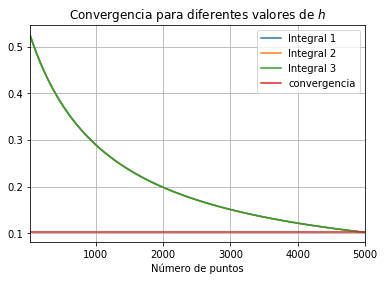

In [24]:
f=exp(-(x*x))*sin(10*x)
num_puntos = linspace(25,5000,100)
integral=np.zeros(len(num_puntos))
integral2=np.zeros(len(num_puntos))
integral3=np.zeros(len(num_puntos))
convergencia=np.zeros(len(num_puntos))
for i in range (0,len(num_puntos)):
    x = linspace(0,5,25+i)
    
    integral[i]=int1(f,x)
    integral2[i]=intSimpson(f,x)
    integral3[i]=intBoole(f,x)
    convergencia[i]=0.1021340744237976138708054220876899

plot(num_puntos,integral,label="Integral 1")
plot(num_puntos,integral2,label="Integral 2")
plot(num_puntos,integral2,label="Integral 3")  
plot(num_puntos,convergencia,label='convergencia')
    #plot(i,integral2,label="Integral de Simpson")
    #plot(i,integral3,label="Integral de Boole")
title("Convergencia para diferentes valores de $h$"),xlabel("Número de puntos")
#hlines(pi/2,num_puntos[0],num_puntos[-1],colors='r', linestyles='dashed',lw=2,label="$\pi /2$")
legend(),grid(),xlim([25,5000])
show()